<br>Use decision trees to prepare a model on fraud data 
<br>treating those who have taxable_income <= 30000 as "Risky" and others are "Good"
<br>
<br>Data Description :
<br>
<br>Undergrad : person is under graduated or not
<br>Marital.Status : marital status of a person
<br>Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government 
<br>Work Experience : Work experience of an individual person
<br>Urban : Whether that person belongs to urban area or not

In [90]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing

In [91]:
#Import the data
fraud_data_0 = pd.read_csv('Fraud_check.csv')
fraud_data_0.head()


,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [92]:
fraud_data_1 = fraud_data_0.copy()
fraud_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [93]:
#Rename the columns
fraud_data_1.rename(mapper={'Marital.Status': 'Marital_Status',
                          'Taxable.Income':'Taxable_Income',
                          'City.Population': 'City_Population',
                          'Work.Experience':'Work_Experience',},axis=1,inplace=True)

In [94]:
fraud_data_risky_or_good = []
for value in fraud_data_1.Taxable_Income:
    if value <= 30000:
        fraud_data_risky_or_good.append('Risky')
    else:
        fraud_data_risky_or_good.append('Good')
fraud_data_1['risky_or_good']= pd.Series(fraud_data_risky_or_good)
fraud_data_1

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban,risky_or_good
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


In [95]:
fraud_data = fraud_data_1.copy()

In [96]:
# Encoding the Object type data
label_encoder = preprocessing.LabelEncoder()
fraud_data['Undergrad'] = label_encoder.fit_transform(fraud_data['Undergrad'])
fraud_data['Marital_Status'] = label_encoder.fit_transform(fraud_data['Marital_Status'])
fraud_data['Urban'] = label_encoder.fit_transform(fraud_data['Urban'])
fraud_data['risky_or_good']=label_encoder.fit_transform(fraud_data.risky_or_good)
fraud_data.head()

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban,risky_or_good
0,0,2,68833,50047,10,1,0
1,1,0,33700,134075,18,1,0
2,0,1,36925,160205,30,1,0
3,1,2,50190,193264,15,1,0
4,0,1,81002,27533,28,0,0


In [97]:
# #Scaling the data set
# standardizer = StandardScaler()
# fraud_data_scaled = standardizer.fit_transform(fraud_data)
# fraud_data_scaled = pd.DataFrame(fraud_data_scaled,columns=fraud_data.columns)
# fraud_data_scaled.head()

In [98]:
# Divide the data set in to X & y
X = fraud_data.drop('risky_or_good',axis=1)
y = fraud_data['risky_or_good']

In [99]:
# Divide the data set in to Train data & Testing Data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=40)

In [100]:
# Building Decision Tree Classifier using Entropy Criteria
model = DecisionTreeClassifier(criterion='entropy')
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

[Text(167.4, 163.07999999999998, 'X[2] <= 29949.5\nentropy = 0.722\nsamples = 420\nvalue = [336, 84]'),
 Text(83.7, 54.360000000000014, 'entropy = 0.0\nsamples = 84\nvalue = [0, 84]'),
 Text(251.10000000000002, 54.360000000000014, 'entropy = 0.0\nsamples = 336\nvalue = [336, 0]')]

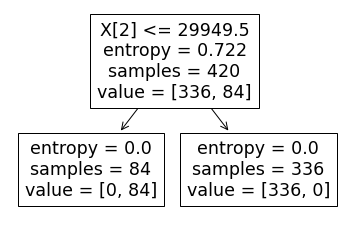

In [101]:
#Plot the decision tree
tree.plot_tree(model)

In [102]:
feature_nms = X.columns
class_values = fraud_data_1.risky_or_good.unique()

[Text(167.4, 163.07999999999998, 'Taxable_Income <= 29949.5\nentropy = 0.722\nsamples = 420\nvalue = [336, 84]\nclass = Good'),
 Text(83.7, 54.360000000000014, 'entropy = 0.0\nsamples = 84\nvalue = [0, 84]\nclass = Risky'),
 Text(251.10000000000002, 54.360000000000014, 'entropy = 0.0\nsamples = 336\nvalue = [336, 0]\nclass = Good')]

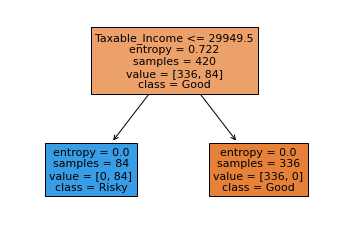

In [103]:
tree.plot_tree(model,feature_names=feature_nms,class_names=class_values,filled=True)


# Model classified as 
## * if Taxable_income <= 29949.5 then ' else 'Good'

In [104]:
# Predict for y_test 
y_predicted = model.predict(X_test)
fraud_data_1['y_predicted'] = pd.Series(y_predicted)
fraud_data_1.y_predicted.value_counts() 

0.0    140
1.0     40
Name: y_predicted, dtype: int64

In [105]:
# Confusion Matrix
confusion_matrix(y_test,y_predicted)

array([[140,   0],
       [  0,  40]], dtype=int64)